### All Techniques Of Hyper Parameter Optimization
1. Manual Search
2. GridSearchCV
3. RandomizedSearchCV
4. Bayesian Optimization -Automate Hyperparameter Tuning (Hyperopt)
5. Sequential Model Based Optimization(Tuning a scikit-learn estimator with skopt)
6. Genetic Algorithms (TPOT Classifier)
7. Optuna- Automate Hyperparameter Tuning

###### References
- https://www.freecodecamp.org/news/hyperparameter-optimization-techniques-machine-learning/
- https://github.com/fmfn/BayesianOptimization
- https://github.com/hyperopt/hyperopt
- https://www.jeremyjordan.me/hyperparameter-tuning/
- https://optuna.org/
- https://towardsdatascience.com/hyperparameters-optimization-526348bb8e2d(By Pier Paolo Ippolito )
- https://scikit-optimize.github.io/stable/auto_examples/hyperparameter-optimization.html


# What is hyperparameter optimization?
Before I define hyperparameter optimization, you need to understand what a hyperparameter and parameter is.

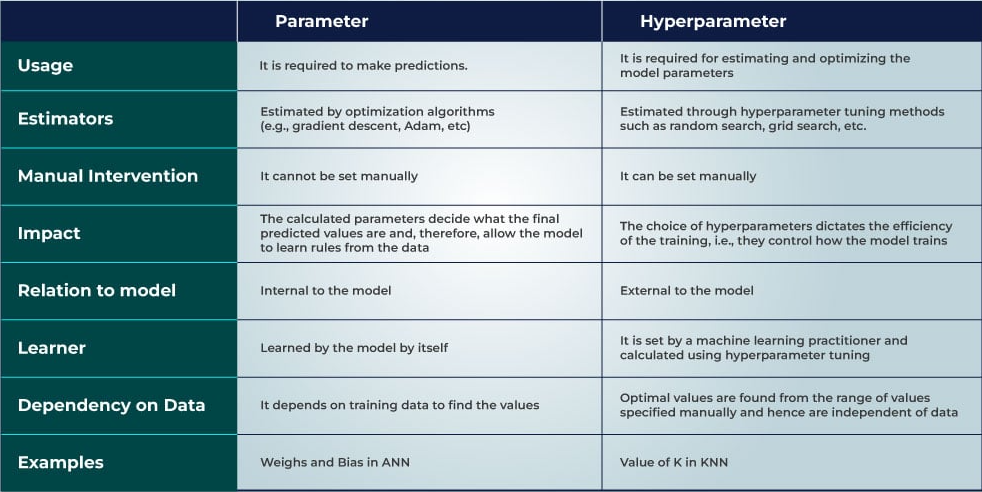

### Hyperparameter optimization is the process of finding the best combination of hyperparameter values to maximize a model's performance on a given dataset within a reasonable timeframe.

| Model                | Hyperparameters                                                                |
|----------------------|--------------------------------------------------------------------------------|
| Ridge and Lasso      | Alpha                                                                          |
| Logistic Regression  | Penalty, C, Solver                                                             |
| KNN                  | n_neighbors                                                                    |
| SVM                  | C, Kernel, Epsilon (For SVR)                                                   |
| NB                   | Alpha                                                                          |
| DT                   | Criterion, max_depth, min_samples_split, min_sample_leaf, max_features         |
| RF and ET            | n_estimators, max_depth, criterion, max_samples_split, min_samples_leaf, max_features |
| XGBoost              | n_estimators, max_depth, learning_rate, subsample, colsample_bytree            |
| Voting               | Estimators, voting                                                             |
| Bagging              | base_estimator, n_estimators                                                   |
| AdaBoost             | base_estimator, n_estimators, learning_rate                                    |
| Deep learning        | number of hidden layers, units per layer, loss, optimizer, Activation, learning_rate, dropout rate, epochs, batch_size, early_stop_patience |
| K means              | n_clusters                                                                     |

# Manual Search
### Manual search is a method of hyperparameter tuning where the data scientist manually selects and adjusts the hyperparameters of the model. This approach is practical when there are few hyperparameters and the model is simple, providing fine-grained control over the tuning process.
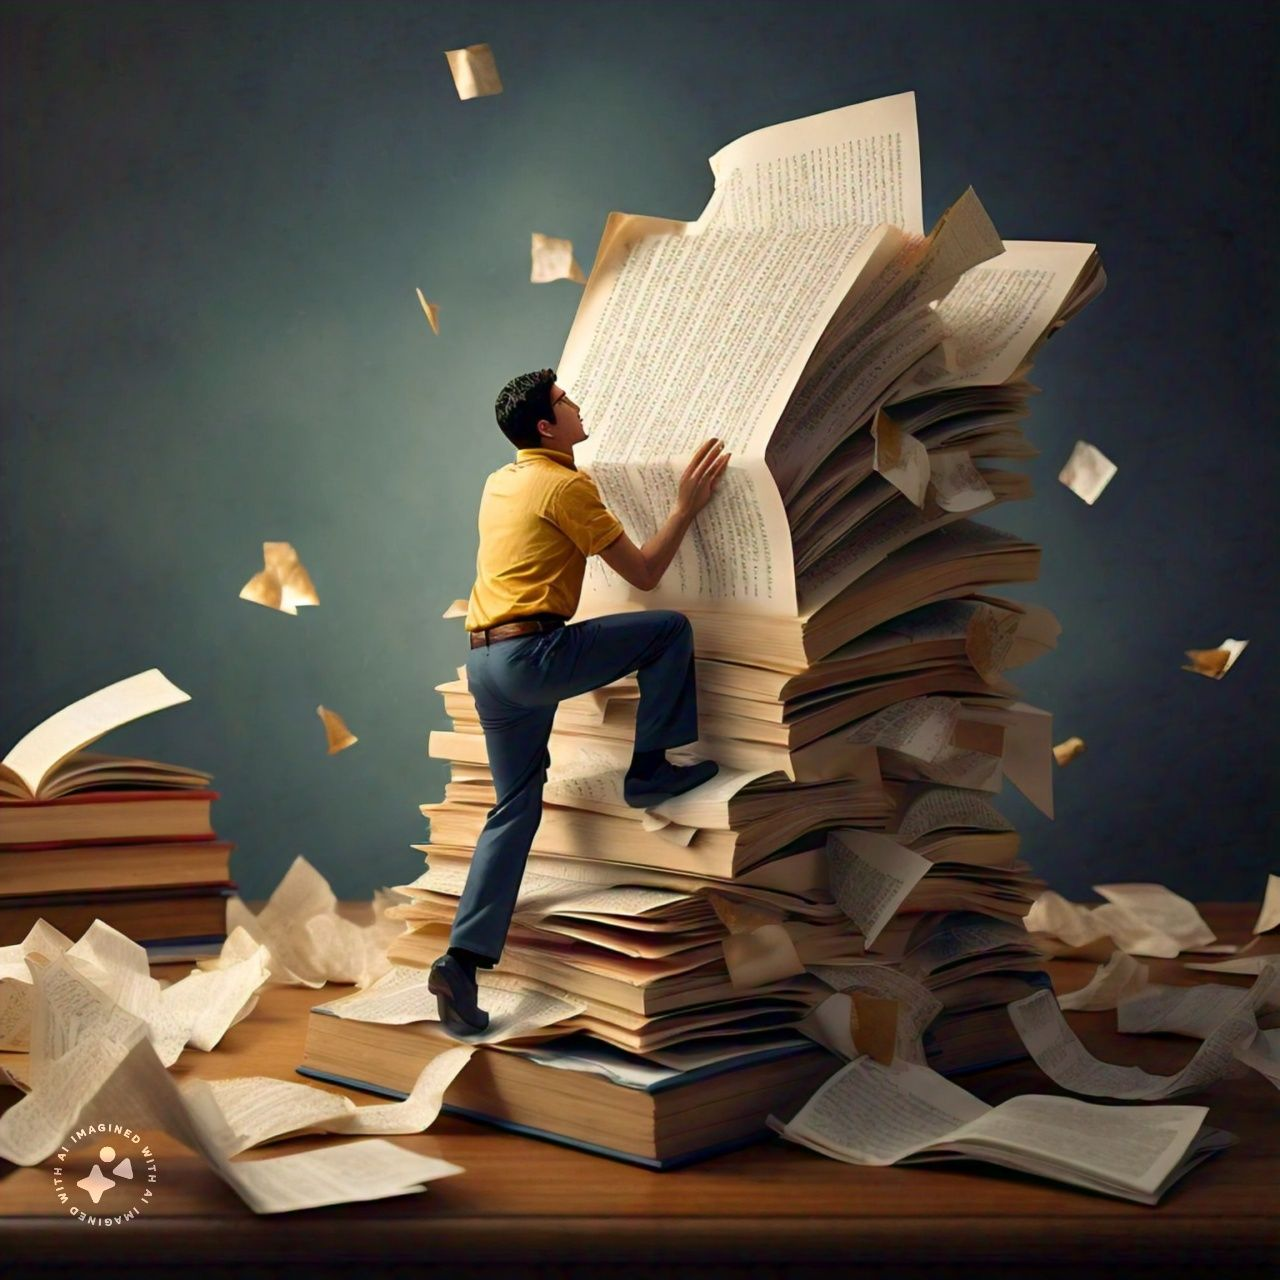

# Example: Logistic Regression
### For a logistic regression model, common hyperparameters include the regularization strength (C). The data scientist defines possible values for these hyperparameters and manually adjusts them to find the best combination.


# Load the Dataset

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the penguins dataset
penguins = sns.load_dataset('penguins').dropna()

# Encode the categorical target variable
label_encoder = LabelEncoder()
penguins['species'] = label_encoder.fit_transform(penguins['species'])

# Separate features and target variable
X = penguins.drop('species', axis=1)
y = penguins['species']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




# Manually chosen hyperparameters

In [13]:
# Manually chosen hyperparameters
params = {
    'C': 0.002,
    #'solver': 'liblinear'
}

# Initialize and train model
model = LogisticRegression(**params)
model.fit(X_train, y_train)

# Evaluate model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8059701492537313


# GridSearch vs RandomSearch

### Grid search fits the model using all the possible combinations available in the user-defined hyperparameter distribution.

### While this method has the highest chance of providing the most optimized hyperparameter values than randomsearch, it can be extremely computationally expensive and time-consuming, especially if there are many hyperparameters or the dataset is large.
![grid vs random.png](<attachment:grid vs random.png>)
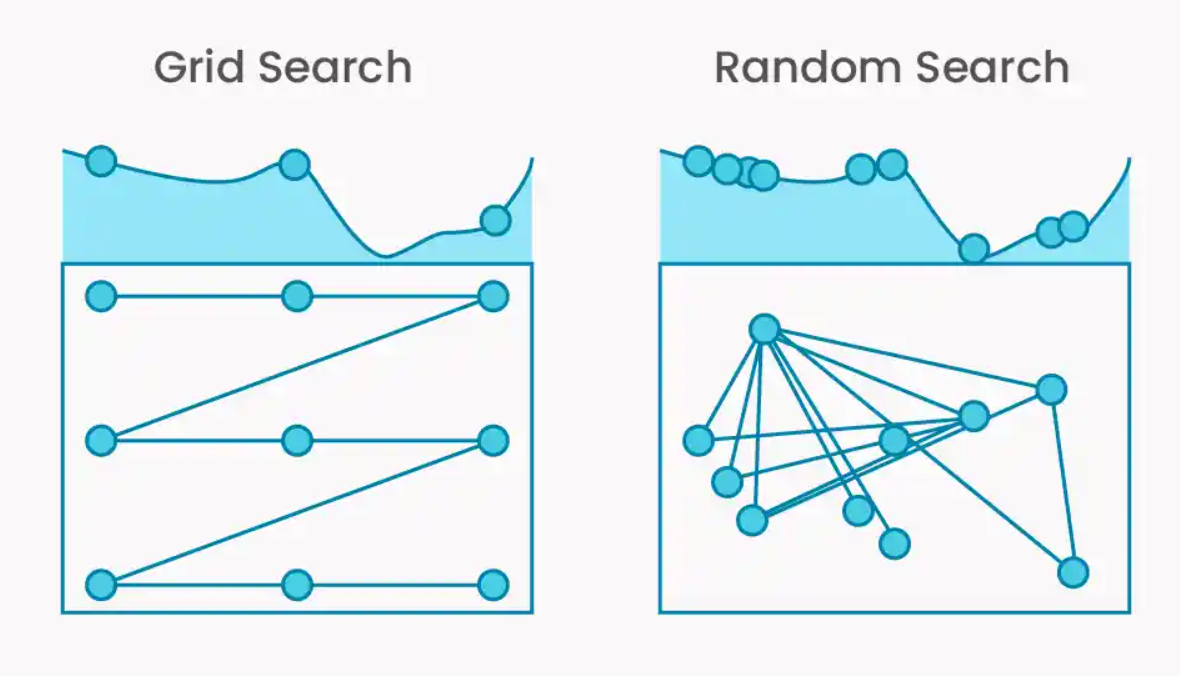

The main parameters used by a Random Forest Classifier are:

- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensamble.

# GridSearchCV

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 1.0


# RandomSearchCV

### RandomSearchCV has the same purpose of GridSearchCV: they both were designed to find the best parameters to improve your model. However, here not all parameters are tested. Rather, the search is randomized

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the RandomForestClassifier and the parameter distribution
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_rf = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 170}
Accuracy: 1.0


### Automated Hyperparameter Tuning


#### Bayesian Optimization  (hyperopt)
Bayesian optimization uses probability to find the minimum of a function. Bayesian methods use past evaluation results to choose the next input values. So, this method excludes the poor input values and limit the evaluation of the objective function by choosing the next input values which have done well in the past..It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time.
In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.

- Objective Function = defines the loss function to minimize.
- Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
- Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.

In [24]:
import numpy as np
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 



###  Domain Space

In [25]:


# Define the search space for hyperparameters
space = {
    'criterion': hp.choice('criterion', ['gini', 'entropy', 'log_loss']),
    'max_depth': hp.quniform('max_depth', 2, 20, 1),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'n_estimators': hp.quniform('n_estimators', 100, 500, 100)
}



Here we use a number of different domain distribution types which are as follows:-

 choice : categorical variables
quniform : discrete uniform (integers spaced evenly)
uniform: continuous uniform (floats spaced evenly)

### Objectiva function

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Define the objective function
def objective(space):
    model = RandomForestClassifier(
        criterion=space['criterion'],
        max_depth=int(space['max_depth']),
        max_features=space['max_features'],
        min_samples_leaf=int(space['min_samples_leaf']),
        min_samples_split=int(space['min_samples_split']),
        n_estimators=int(space['n_estimators']),
        random_state=42
    )

    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK}


In [27]:
# Run the optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

# Print the best hyperparameters
print('Best hyperparameters:', best)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [03:39<00:00,  2.20s/trial, best loss: -0.9887491264849755]
Best hyperparameters: {'criterion': 0, 'max_depth': 8.0, 'max_features': 0, 'min_samples_leaf': 1.0, 'min_samples_split': 7.0, 'n_estimators': 400.0}


In [42]:
# Map indices to actual values for categorical hyperparameters
best_params = {
    'criterion': ['gini', 'entropy', 'log_loss'][best['criterion']],
    'max_depth': int(best['max_depth']),
    'max_features': ['sqrt', 'log2', None][best['max_features']],
    'min_samples_leaf': int(best['min_samples_leaf']),
    'min_samples_split': int(best['min_samples_split']),
    'n_estimators': int(best['n_estimators'])
}

In [46]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Train the RandomForestClassifier with the best hyperparameters
trainedforest = RandomForestClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

trainedforest.fit(X_train, y_train)

# Evaluate the model
predictionforest = trainedforest.predict(X_test)
# print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))

1.0


#### Genetic Algorithms
Genetic Algorithms tries to apply natural selection mechanisms to Machine Learning contexts.

Let's immagine we create a population of N Machine Learning models with some predifined Hyperparameters. We can then calculate the accuracy of each model and decide to keep just half of the models (the ones that performs best). We can now generate some offsprings having similar Hyperparameters to the ones of the best models so that go get again a population of N models. At this point we can again caltulate the accuracy of each model and repeate the cycle for a defined number of generations. In this way, just the best models will survive at the end of the process.

In [47]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [50]:

from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

                                                                            
Generation 1 - Current best internal CV score: 0.9888059701492538
                                                                            
Generation 2 - Current best internal CV score: 0.9925373134328358
                                                                            
Generation 3 - Current best internal CV score: 0.9925373134328358
                                                                            
Generation 4 - Current best internal CV score: 0.9925373134328358
                                                                            
Generation 5 - Current best internal CV score: 0.9925373134328358
                                                                            
Best pipeline: RandomForestClassifier(input_matrix, criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                      890,
                                                                                      1000],
                                                                        'max_features': ['auto',
                                                                                         'sqrt',
                                                                                         'log2'],
                                                                        'min_samples_leaf': [1,
                                                                                             2,
                                                                                             4,
                                                                                             6,
                                                                                             8],
                                                                        'min_samples_split': [2,
                                                                                              5,
                                                                                              10,
                                                                                              14],
                                                                        'n_estimators': [200,
                                                                                         400,
                                                                                         600,
                                                                                         800,
                                                                                         1000,
                                                                                         1200,
                                                                                         1400,
                                                                                         1600,
                                                                                         1800,
                                                                                         2000]}},
               cv=4, early_stop=12, generations=5, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)

In [51]:

accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

1.0


In [52]:
# Evaluate the model
predictionforest_tpot = tpot_classifier.predict(X_test)
print(confusion_matrix(y_test,predictionforest_tpot))
print(accuracy_score(y_test,predictionforest_tpot))
print(classification_report(y_test,predictionforest_tpot))

[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



# A Quick Introduction to Optuna
![key feature of optuna .png](<attachment:key feature of optuna .png>)
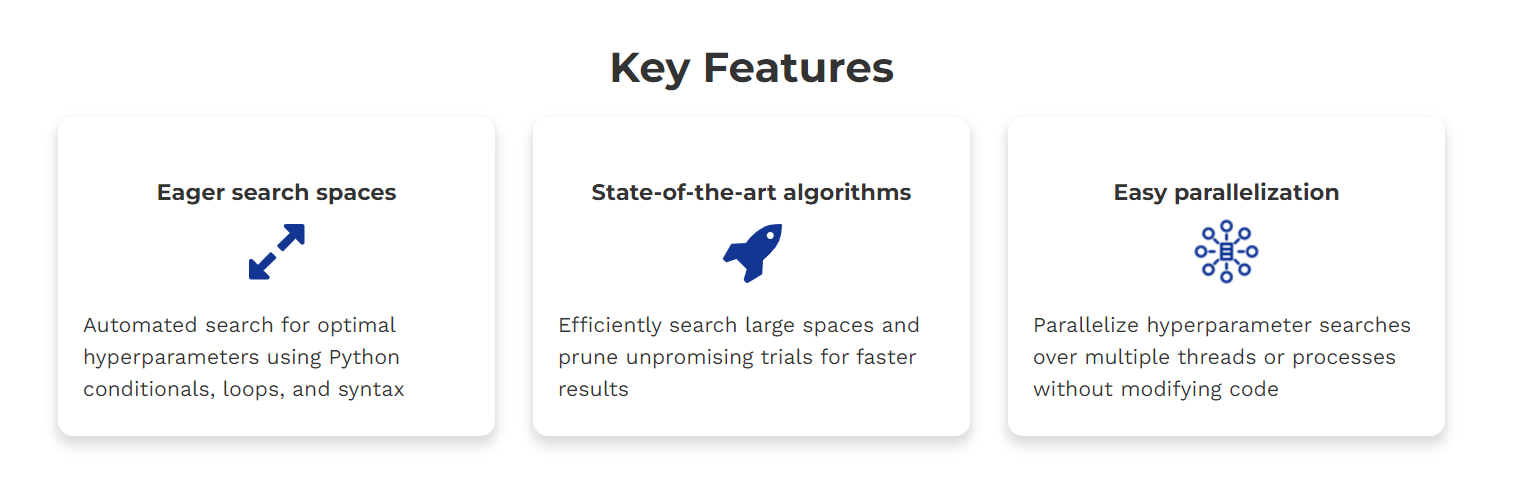

## Install `optuna`

Optuna can be installed via `pip` or `conda`.

In [ ]:
! pip install --quiet optuna

In [ ]:
import optuna

optuna.__version__

## Optimize Hyperparameters

### Define a simple scikit-learn model

We start with a simple random forest model to classify flowers in the Iris dataset. We define a function called `objective` that encapsulates the whole training process and outputs the accuracy of the model.



In [1]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection


def objective():
    iris = sklearn.datasets.load_iris()  # Prepare the data.

    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=5, max_depth=3)  # Define the model.

    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3
    ).mean()  # Train and evaluate the model.


print("Accuracy: {}".format(objective()))

Accuracy: 0.96


### Optimize hyperparameters of the model

The hyperparameters of the above algorithm are `n_estimators` and `max_depth` for which we can try different values to see if the model accuracy can be improved. The `objective` function is modified to accept a trial object. This trial has several methods for sampling hyperparameters. We create a study to run the hyperparameter optimization and finally read the best hyperparameters.


In [2]:
import optuna


def objective(trial):
    iris = sklearn.datasets.load_iris()

    n_estimators = trial.suggest_int("n_estimators", 2, 20)
    max_depth = int(trial.suggest_float("max_depth", 1, 32, log=True))

    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3
    ).mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

trial = study.best_trial

print("Accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))


[I 2024-07-03 16:52:26,073] A new study created in memory with name: no-name-1c4afd72-b19b-49b8-8532-f76f93a7d5ea
[I 2024-07-03 16:52:27,251] Trial 0 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 9, 'max_depth': 2.145064405880185}. Best is trial 0 with value: 0.9466666666666667.
[I 2024-07-03 16:52:27,464] Trial 1 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 19, 'max_depth': 26.520420362497195}. Best is trial 1 with value: 0.9666666666666667.
[I 2024-07-03 16:52:27,570] Trial 2 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 16, 'max_depth': 12.099882900205113}. Best is trial 1 with value: 0.9666666666666667.
[I 2024-07-03 16:52:27,633] Trial 3 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 13, 'max_depth': 24.413091803488616}. Best is trial 1 with value: 0.9666666666666667.
[I 2024-07-03 16:52:27,679] Trial 4 finished with value: 0.9533333333333333 and parameters: {'n_estimators':

Accuracy: 0.9733333333333333
Best hyperparameters: {'n_estimators': 20, 'max_depth': 5.17139817071564}


It is possible to condition hyperparameters using Python `if` statements. We can for instance include another classifier, a support vector machine, in our HPO and define hyperparameters specific to the random forest model and the support vector machine.


In [3]:
import sklearn.svm


def objective(trial):
    iris = sklearn.datasets.load_iris()

    classifier = trial.suggest_categorical("classifier", ["RandomForest", "SVC"])

    if classifier == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 2, 20)
        max_depth = int(trial.suggest_float("max_depth", 1, 32, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth
        )
    else:
        c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)

        clf = sklearn.svm.SVC(C=c, gamma="auto")

    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3
    ).mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

trial = study.best_trial

print("Accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))


[I 2024-07-03 16:52:43,668] A new study created in memory with name: no-name-f4d9c2c2-edd1-460a-b658-ff2f64a8ca34
[I 2024-07-03 16:52:43,706] Trial 0 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 877362.8310492964}. Best is trial 0 with value: 0.96.
[I 2024-07-03 16:52:43,738] Trial 1 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 0.0026033303565270605}. Best is trial 0 with value: 0.96.
[I 2024-07-03 16:52:43,835] Trial 2 finished with value: 0.9466666666666667 and parameters: {'classifier': 'RandomForest', 'n_estimators': 18, 'max_depth': 2.8101687446087418}. Best is trial 0 with value: 0.96.
[I 2024-07-03 16:52:43,859] Trial 3 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 5.226137726109285e-09}. Best is trial 0 with value: 0.96.
[I 2024-07-03 16:52:43,882] Trial 4 finished with value: 0.9 and parameters: {'classifier': 'RandomForest', 'n_estimators': 2, 'max_depth': 2.9009083927351766}. Best is trial 0 w

Accuracy: 0.9866666666666667
Best hyperparameters: {'classifier': 'SVC', 'svc_c': 3.6684092393837617}


### Plotting the study
Plotting the optimization history of the study.


In [4]:
optuna.visualization.plot_optimization_history(study)


Plotting the accuracies for each hyperparameter for each trial.


In [5]:
optuna.visualization.plot_slice(study)


Plotting the accuracy surface for the hyperparameters involved in the random forest model.



In [6]:
optuna.visualization.plot_contour(study, params=["n_estimators", "max_depth"])